In [35]:
!pip install scikit-posthocs

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 45.0 MB/s eta 0:00:0000:010:01
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import scipy.stats as stats
import scikit_posthocs as sp
import pandas as pd
import numpy as np
import json
import os
import sys

In [3]:
json_file_path_investment = 'investment_mean_output.json'
with open(json_file_path_investment, 'r') as f:
    investment_data = json.load(f)

investment_df = pd.DataFrame(investment_data).T
investment_df.index = pd.to_datetime(investment_df.index)

In [4]:
investment_df['year'] = investment_df.index.year
investment_df['month'] = investment_df.index.month
investment_df['day'] = investment_df.index.day
investment_df['week'] = investment_df.index.isocalendar().week

In [5]:
investment_df.head()

,price_impact,demand_impact,supply_impact,year,month,day,week
2018-01-01,0.000000,2.666667,3.000000,2018,1,1,1
2018-01-08,1.500000,2.500000,3.500000,2018,1,8,2
2018-01-15,2.000000,3.333333,4.000000,2018,1,15,3
2018-01-22,1.333333,3.500000,3.666667,2018,1,22,4
2018-01-29,3.500000,3.000000,3.000000,2018,1,29,5


In [6]:
json_file_path_supply_chain = 'supply_chain_mean_output2.json'
with open(json_file_path_supply_chain, 'r') as f:
    supply_chain_data = json.load(f)

supply_chain_df = pd.DataFrame(supply_chain_data).T
supply_chain_df.index = pd.to_datetime(supply_chain_df.index)

In [7]:
supply_chain_df['year'] = supply_chain_df.index.year
supply_chain_df['month'] = supply_chain_df.index.month
supply_chain_df['day'] = supply_chain_df.index.day
supply_chain_df['week'] = supply_chain_df.index.isocalendar().week

In [8]:
supply_chain_df

,price_impact,demand_impact,supply_impact,year,month,day,week
2018-01-01,4.000000,4.000000,3.000000,2018,1,1,1
2018-01-08,3.000000,4.000000,3.000000,2018,1,8,2
2018-01-15,0.000000,0.000000,0.000000,2018,1,15,3
2018-01-22,4.000000,5.000000,4.000000,2018,1,22,4
2018-01-29,0.000000,0.000000,0.000000,2018,1,29,5
...,...,...,...,...,...,...,...
2024-04-26,2.000000,2.600000,0.200000,2024,4,26,17
2024-05-03,1.666667,3.000000,1.333333,2024,5,3,18
2024-05-10,1.571429,3.285714,3.000000,2024,5,10,19
2024-05-17,1.857143,3.142857,3.000000,2024,5,17,20


1. inter-keyword

Text(0.5, 1.0, 'Histogram of supply impact')

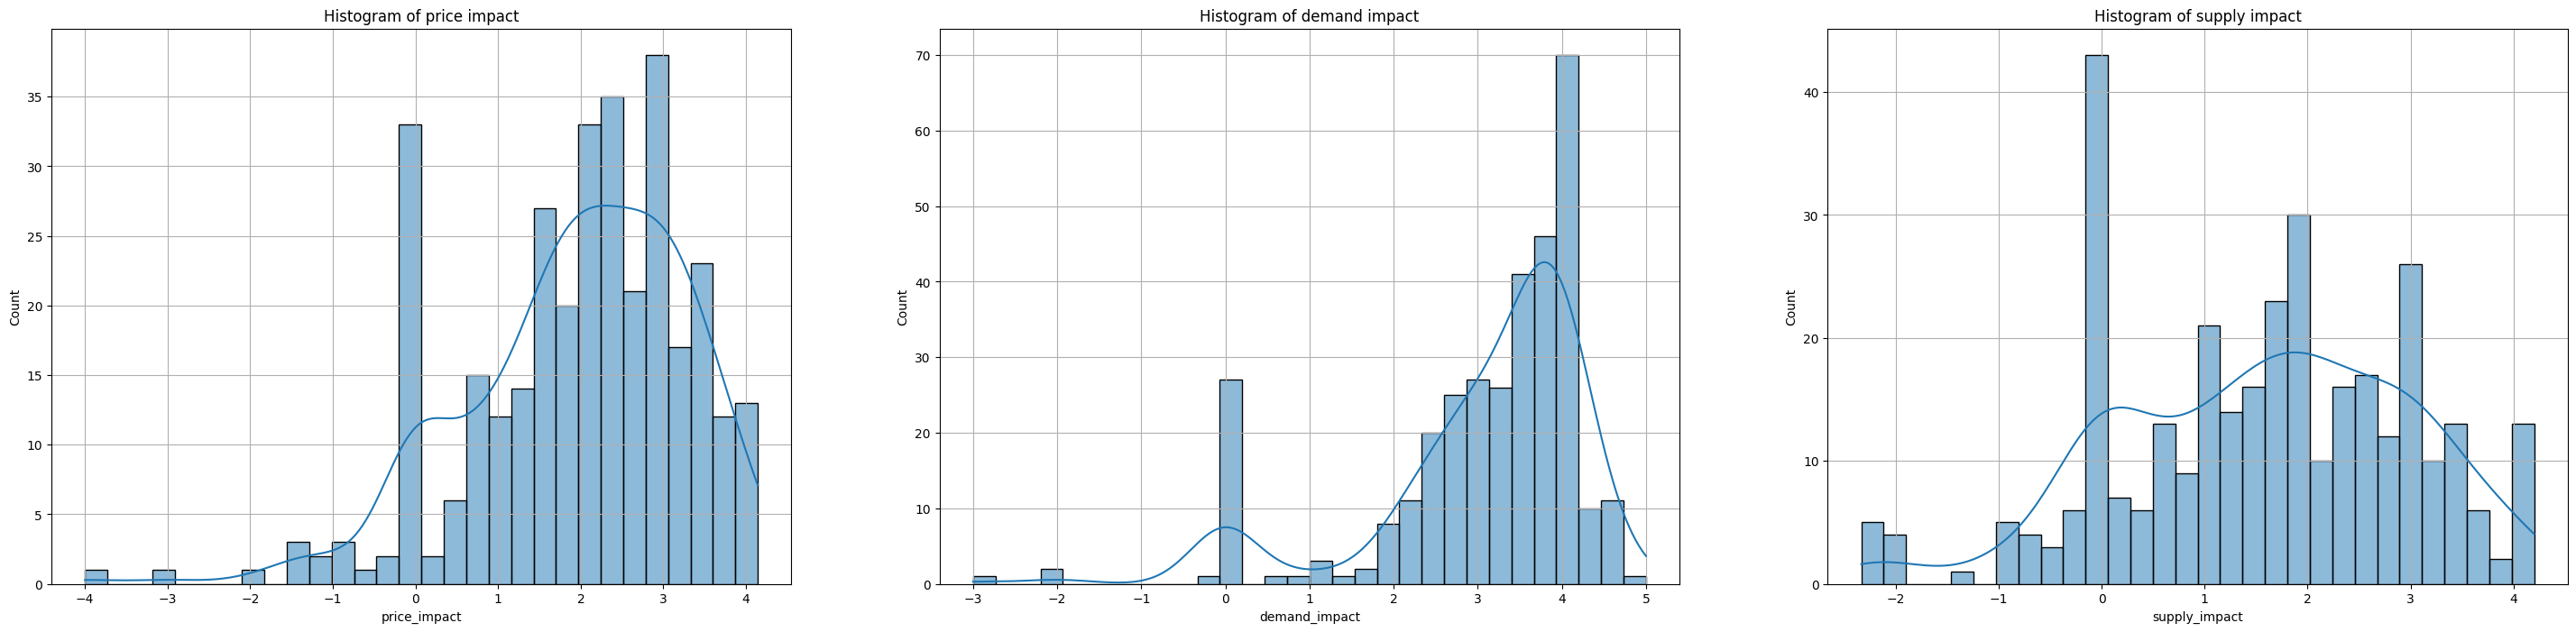

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(36, 8))
sns.histplot(data=supply_chain_df, x='price_impact', kde=True, bins=30, ax=ax[0])
ax[0].grid()
ax[0].set_title('Histogram of price impact')

sns.histplot(data=supply_chain_df, x='demand_impact', kde=True, bins=30, ax=ax[1])
ax[1].grid()
ax[1].set_title('Histogram of demand impact')

sns.histplot(data=supply_chain_df, x='supply_impact', kde=True, bins=30, ax=ax[2])
ax[2].grid()
ax[2].set_title('Histogram of supply impact')

In [47]:
price_cols = ['price_impact', 'year', 'month', 'day', 'week']
demand_cols = ['demand_impact', 'year', 'month', 'day', 'week']
supply_cols = ['supply_impact', 'year', 'month', 'day', 'week']

group1 = supply_chain_df[price_cols[0]]
group2 = supply_chain_df[demand_cols[0]]
group3 = supply_chain_df[supply_cols[0]]

In [26]:
# 1.1 Shapiro-Wilk 테스트 (정규성 검정)
# H0: 데이터가 정규분포를 따른다.
# H1: 데이터가 정규분포를 따르지 않는다.
shapiro_group1 = stats.shapiro(group1)
shapiro_group2 = stats.shapiro(group2)
shapiro_group3 = stats.shapiro(group3)

print(f"Shapiro-Wilk Test Group 1: W={shapiro_group1[0]}, p={round(shapiro_group1[1], 4)}")
print(f"Shapiro-Wilk Test Group 2: W={shapiro_group2[0]}, p={round(shapiro_group2[1], 4)}")
print(f"Shapiro-Wilk Test Group 3: W={shapiro_group3[0]}, p={round(shapiro_group3[1], 4)}")

Shapiro-Wilk Test Group 1: W=0.949916876124979, p=0.0
Shapiro-Wilk Test Group 2: W=0.8086553743931143, p=0.0
Shapiro-Wilk Test Group 3: W=0.9735893576310585, p=0.0


-> 데이터가 정규분포를 따르지 않음

In [27]:
# 1.2 Kolmogorov-Smirnov 테스트 (정규성 검정)
# H0: 데이터가 정규분포를 따른다.
# H1: 데이터가 정규분포를 따르지 않는다.
ks_group1 = stats.kstest(group1, 'norm', args=(np.mean(group1), np.std(group1)))
ks_group2 = stats.kstest(group2, 'norm', args=(np.mean(group2), np.std(group2)))
ks_group3 = stats.kstest(group3, 'norm', args=(np.mean(group3), np.std(group3)))

print(f"Kolmogorov-Smirnov Test Group 1: D={ks_group1[0]}, p={round(ks_group1[1], 4)}")
print(f"Kolmogorov-Smirnov Test Group 2: D={ks_group2[0]}, p={round(ks_group2[1], 4)}")
print(f"Kolmogorov-Smirnov Test Group 3: D={ks_group3[0]}, p={round(ks_group3[1], 4)}")

Kolmogorov-Smirnov Test Group 1: D=0.08933626028429448, p=0.0089
Kolmogorov-Smirnov Test Group 2: D=0.17087776810459587, p=0.0
Kolmogorov-Smirnov Test Group 3: D=0.07735789765249881, p=0.0344


-> 데이터 정규분포 따르지 않음

In [28]:
# 2. Levene's Test (등분산성 검정)
levene_test = stats.levene(group1, group2, group3)
print(f"Levene's Test: W={levene_test[0]}, p={round(levene_test[1], 4)}")

Levene's Test: W=7.4209963382946444, p=0.0006


In [30]:
# # Anova test -> 등분산성과 정규성을 만족해야하는데 둘 다 만족하지 않음
# anova = stats.f_oneway(group1, group2, group3)

# print(f"ANOVA Test: F={anova[0]}, p={round(anova[1], 4)}")

In [33]:
# Kruksal-Wallis test
# H0: 모든 그룹의 중앙값이 같다.
# H1: 적어도 하나의 그룹의 중앙값이 다르다.
# 프리드먼 검정이 사용될 때: 같은 대상에 대해 여러 조건을 측정한 경우
# 크루스칼-왈리스 검정이 사용될 때: 독립적인 여러 그룹을 비교하는 경우
kruskal = stats.kruskal(group1, group2, group3)
print(f"Kruskal-Wallis Test: H={kruskal[0]}, p={round(kruskal[1], 4)}")

Kruskal-Wallis Test: H=233.4483217436194, p=0.0


-> 뭔가 차이가 난다

In [48]:
# 사후 검정: Dunn's test
data = [group1, group2, group3]
dunn_test = sp.posthoc_dunn(data, p_adjust='bonferroni')
# •	Bonferroni 보정: 다중 비교를 할 때, Type I 오류(거짓 양성)를 줄이기 위해 p-value를 보정합니다. 이 예시에서는 Bonferroni 보정을 사용했지만, p_adjust 매개변수로 다른 보정 방법(예: ‘holm’, ‘fdr_bh’ 등)을 선택할 수도 있습니다.

print("Dunn's Test 결과 (p-value):")
print(round(dunn_test, 4))

Dunn's Test 결과 (p-value):
        1    2       3
1  1.0000  0.0  0.0062
2  0.0000  1.0  0.0000
3  0.0062  0.0  1.0000


-> 세 그룹 모두 유의미하게 다름

### investment keyword

Text(0.5, 1.0, 'Histogram of supply impact')

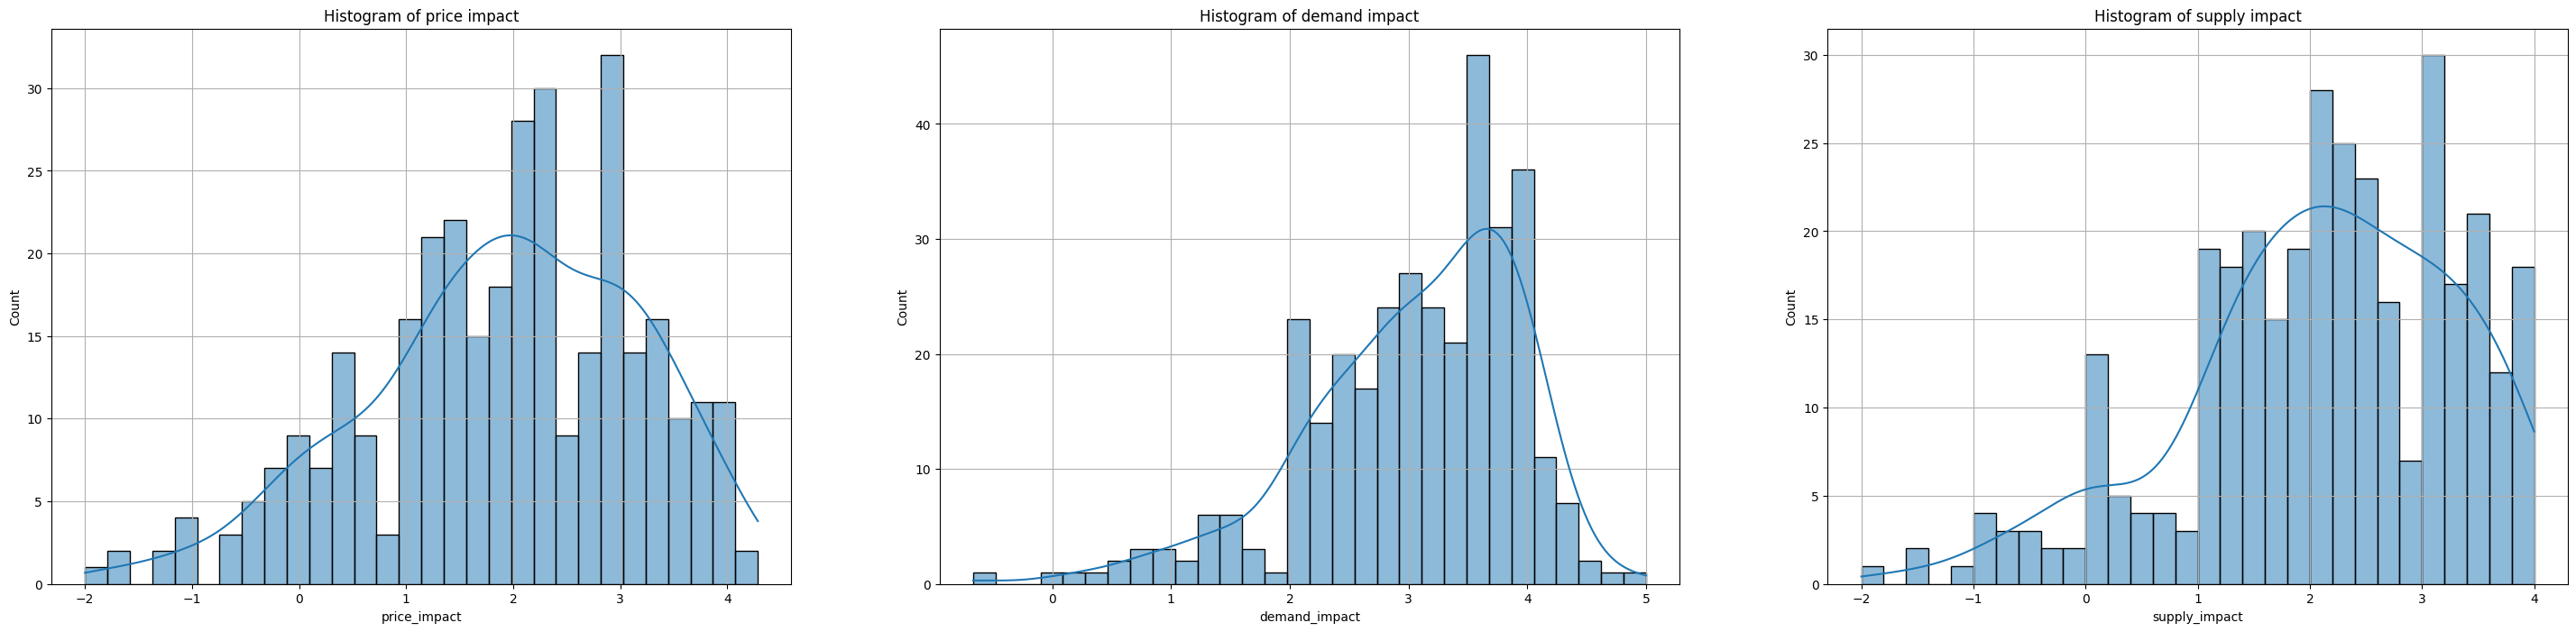

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(36, 8))
sns.histplot(data=investment_df, x='price_impact', kde=True, bins=30, ax=ax[0])
ax[0].grid()
ax[0].set_title('Histogram of price impact')

sns.histplot(data=investment_df, x='demand_impact', kde=True, bins=30, ax=ax[1])
ax[1].grid()
ax[1].set_title('Histogram of demand impact')

sns.histplot(data=investment_df, x='supply_impact', kde=True, bins=30, ax=ax[2])
ax[2].grid()
ax[2].set_title('Histogram of supply impact')

In [49]:
price_cols = ['price_impact', 'year', 'month', 'day', 'week']
demand_cols = ['demand_impact', 'year', 'month', 'day', 'week']
supply_cols = ['supply_impact', 'year', 'month', 'day', 'week']

group1 = investment_df[price_cols[0]]
group2 = investment_df[demand_cols[0]]
group3 = investment_df[supply_cols[0]]

In [40]:
# 1.1 Shapiro-Wilk 테스트 (정규성 검정)
# H0: 데이터가 정규분포를 따른다.
# H1: 데이터가 정규분포를 따르지 않는다.
shapiro_group1 = stats.shapiro(group1)
shapiro_group2 = stats.shapiro(group2)
shapiro_group3 = stats.shapiro(group3)

print(f"Shapiro-Wilk Test Group 1: W={shapiro_group1[0]}, p={round(shapiro_group1[1], 4)}")
print(f"Shapiro-Wilk Test Group 2: W={shapiro_group2[0]}, p={round(shapiro_group2[1], 4)}")
print(f"Shapiro-Wilk Test Group 3: W={shapiro_group3[0]}, p={round(shapiro_group3[1], 4)}")

Shapiro-Wilk Test Group 1: W=0.9768983194708493, p=0.0
Shapiro-Wilk Test Group 2: W=0.9428551852095997, p=0.0
Shapiro-Wilk Test Group 3: W=0.9627340210533267, p=0.0


In [41]:
# 1.2 Kolmogorov-Smirnov 테스트 (정규성 검정)
# H0: 데이터가 정규분포를 따른다.
# H1: 데이터가 정규분포를 따르지 않는다.
ks_group1 = stats.kstest(group1, 'norm', args=(np.mean(group1), np.std(group1)))
ks_group2 = stats.kstest(group2, 'norm', args=(np.mean(group2), np.std(group2)))
ks_group3 = stats.kstest(group3, 'norm', args=(np.mean(group3), np.std(group3)))

print(f"Kolmogorov-Smirnov Test Group 1: D={ks_group1[0]}, p={round(ks_group1[1], 4)}")
print(f"Kolmogorov-Smirnov Test Group 2: D={ks_group2[0]}, p={round(ks_group2[1], 4)}")
print(f"Kolmogorov-Smirnov Test Group 3: D={ks_group3[0]}, p={round(ks_group3[1], 4)}")

Kolmogorov-Smirnov Test Group 1: D=0.06020682565122748, p=0.1692
Kolmogorov-Smirnov Test Group 2: D=0.09448107620149493, p=0.0047
Kolmogorov-Smirnov Test Group 3: D=0.06221981755806405, p=0.1433


In [42]:
# 2. Levene's Test (등분산성 검정)
levene_test = stats.levene(group1, group2, group3)
print(f"Levene's Test: W={levene_test[0]}, p={round(levene_test[1], 4)}")

Levene's Test: W=18.950847510690547, p=0.0


In [43]:
# Kruksal-Wallis test
# H0: 모든 그룹의 중앙값이 같다.
# H1: 적어도 하나의 그룹의 중앙값이 다르다.
# 프리드먼 검정이 사용될 때: 같은 대상에 대해 여러 조건을 측정한 경우
# 크루스칼-왈리스 검정이 사용될 때: 독립적인 여러 그룹을 비교하는 경우
kruskal = stats.kruskal(group1, group2, group3)
print(f"Kruskal-Wallis Test: H={kruskal[0]}, p={round(kruskal[1], 4)}")

Kruskal-Wallis Test: H=177.55659417298276, p=0.0


In [50]:
# 사후 검정: Dunn's test
data = [group1, group2, group3]
dunn_test = sp.posthoc_dunn(data, p_adjust='bonferroni')
# •	Bonferroni 보정: 다중 비교를 할 때, Type I 오류(거짓 양성)를 줄이기 위해 p-value를 보정합니다. 이 예시에서는 Bonferroni 보정을 사용했지만, p_adjust 매개변수로 다른 보정 방법(예: ‘holm’, ‘fdr_bh’ 등)을 선택할 수도 있습니다.

print("Dunn's Test 결과 (p-value):")
print(round(dunn_test, 4))

Dunn's Test 결과 (p-value):
        1    2       3
1  1.0000  0.0  0.1715
2  0.0000  1.0  0.0000
3  0.1715  0.0  1.0000


키워드간 비교

In [51]:
group1_investment = investment_df['price_impact']
group2_investment = investment_df['demand_impact']
group3_investment = investment_df['supply_impact']

group1_supply_chain = supply_chain_df['price_impact']
group2_supply_chain = supply_chain_df['demand_impact']
group3_supply_chain = supply_chain_df['supply_impact']

In [56]:
# Mann-Whitney U 테스트
# H0: 두 그룹의 중앙값이 같다.
# H1: 두 그룹의 중앙값이 다르다.
# 왜 쓸까? 정규성/등분산성을 만족하지 않는 경우, 두 그룹 간의 차이를 검정하기 위해 사용
# 두 그룹이 독립인 경우 -> 종속일때는 Wilcoxon signed-rank test 사용
mann_whitney_test = stats.mannwhitneyu(group1_investment, group1_supply_chain, alternative='two-sided')
print(f"Mann-Whitney U Test in price: U={mann_whitney_test.statistic}, p={round(mann_whitney_test.pvalue, 4)}")

mann_whitney_test = stats.mannwhitneyu(group2_investment, group2_supply_chain, alternative='two-sided')
print(f"Mann-Whitney U Test in demand: U={mann_whitney_test.statistic}, p={round(mann_whitney_test.pvalue, 4)}")

mann_whitney_test = stats.mannwhitneyu(group3_investment, group3_supply_chain, alternative='two-sided')
print(f"Mann-Whitney U Test in supply: U={mann_whitney_test.statistic}, p={round(mann_whitney_test.pvalue, 4)}")

Mann-Whitney U Test in price: U=54265.5, p=0.4608
Mann-Whitney U Test in demand: U=49199.0, p=0.0057
Mann-Whitney U Test in supply: U=68885.0, p=0.0
